# Forzado arbitrario de un sistema de un único grado de libertad

[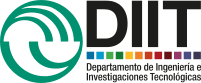](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Forzado periódico

![](figuras/fig_3_22.png)

La _leva_ empuja el _seguidor_ presionado en el extremo opuesto por el resorte de constante elástica $k_2$.
La rotación a velocidad constante $\omega_0$ del motor solidario a la leva resulta en una posición para este extremo del seguidor $y(t)$, que es periódica en $T_0 = \frac{2 \pi}{\omega_0}$.
![](figuras/fig_3_23.png)

En consecuencia la fuerza que este resorte ejerce sobre $m$ también guarda este período.

### Serie de Fourier

> **Referencia**
> - 4.5 Principio de superposición. Las series de Fourier  
Dinámica clásica de las partículas y los sistemas  
J. B. Marion  
> - https://es.wikipedia.org/wiki/Serie_de_Fourier  
> - https://mathworld.wolfram.com/FourierSeries.html

Esta fuerza, como cualquier otra periódica, puede descomponerse en una base armónica de senos y cosenos periódicos en el período $T$:

$$
\cos{\left( n \frac{2 \pi}{T} t \right)}\\
\sin{\left( n \frac{2 \pi}{T} t \right)}
$$
La operación de descomposición es una proyección en los elementos de esta base:

$$
a_0 = \frac{2}{T} \int_0^{T} F(t) dt \\
a_n = \frac{2}{T} \int_0^{T} F(t) \cos{\left( n \frac{2 \pi}{T} t \right)} dt \\
b_n = \frac{2}{T} \int_0^{T} F(t) \sin{\left( n \frac{2 \pi}{T} t \right)} dt
$$
Resulta en una serie infinita llamada **serie de Fourier**:

$$
F(t) = \frac{a_0}{2} + \sum_{n=1}^\infty \left[
a_n \cos{\left( n \frac{2 \pi}{T} t \right)} +
b_n \sin{\left( n \frac{2 \pi}{T} t \right)}
\right]
$$

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales
import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sym.symbols('t') # tiempo
m, k1, k2, l1, l2, c, omega0, r1, r2 = sym.symbols('m, k_1, k_2, l_1, l_2, c, omega_0, r_1, r_2', positive = True)
F2_simbolo, y, x = mech.dynamicsymbols('F_2 y x')

Consideraré que ambos resortes tienen longitudes de reposo $l_1, l_2$ en que no ejercen fuerza.

In [3]:
T0 = 2* sym.pi/ omega0
y = r1+ (r2- r1)* (t/T0)
F2 = -k2* (l2- y)
F2

Para graficar una $F_2(t)$ se establecen parámetros del sistema.

In [4]:
m_magnitud = 10 # [kg]
k1_magnitud = 1.0E3 # [N m-1]
k2_magnitud = 8.0E3 # [N m-1]
r1_magnitud = 0.1 # [m]
r2_magnitud = 0.15 # [m]
l1_magnitud = 0.5 # [m]
l2_magnitud = r1_magnitud # [m] (elegido para que el resorte no haga fuerza en el punto bajo de la leva)
c_magnitud = 40 # [N m-1 s]
omega0_rmp = 6 # [rpm]
omega0_magnitud = (omega0_rmp/60)* 2* sym.pi # [rad s-1]

parametros = {
    m : m_magnitud,
    k1 : k1_magnitud,
    k2 : k2_magnitud,
    r1 : r1_magnitud,
    r2 : r2_magnitud,
    l1 : l1_magnitud,
    l2 : l2_magnitud,
    c : c_magnitud,
    omega0 : omega0_magnitud
}

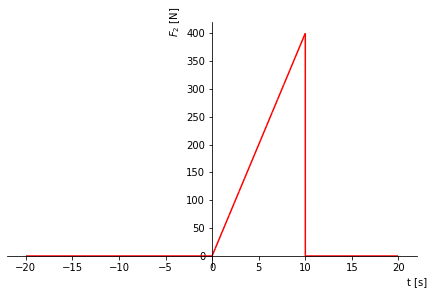

In [5]:
T0_num = T0.subs(parametros)
F2_unPeriodo = sym.Piecewise((0,t<0), (0,t> T0_num), (F2,True))
F2_unPeriodo_plot = sym.plot(F2_unPeriodo.subs(parametros),
                             (t, -(2* T0_num), (2* T0_num) ),
                             ylabel='$F_2$ [N]', xlabel='t [s]', line_color= 'r', show=False )
F2_unPeriodo_plot.show()

Y calcular los coeficientes de la serie de Fourier de la función con ese período.

In [6]:
F2_serieFourier = sym.fourier_series(F2, limits=(t, 0, T0) )
F2_serieFourier.a0, F2_serieFourier.an, F2_serieFourier.bn

La serie infinita puede truncarse a una cantidad finita de términos.

In [7]:
F2_serieFourier.truncate(n=4) # primeros 4 términos

Con unos pocos términos se puede lograr una reconstrucción bastante fiel de $F(t)$.

In [8]:
F2_serieFourier_pocosTerminos = F2_serieFourier.truncate(6)
F2_serieFourier_pocosTerminos

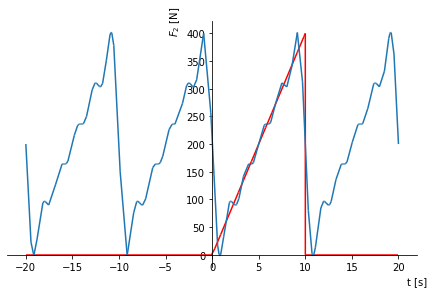

In [9]:
F2_serieFourier_plot = sym.plot(F2_unPeriodo.subs(parametros),
                                F2_serieFourier_pocosTerminos.subs(parametros),
                                (t, -2* T0_num, 2* T0_num ),
                                ylabel='$F_2$ [N]', xlabel='t [s]',
                                show=False )
F2_serieFourier_plot[0].line_color='g'
F2_serieFourier_plot.show()

Como la ecuación diferencial para un sistema forzado es lineal, el efecto de cada uno de los $n$ armónicos en la serie puede calcularse por separado y luego sumar cada solución particular $x_{pn}$ correspondiente.
En la terminología de las ecuaciones diferenciales lineales esto es lo que indica el **principio de superposición**.

## Dinámica resultante

![](figuras/fig_3_22_rectorte.png)

Habiendo calculado el forzante $F_2(t)$ el sistema es equivalente a los previamente analizados.

In [10]:
x_EL_homogenea = m* x.diff(t,2) + c* x.diff(t) + k1* x
x_EL_forzado = sym.Eq(x_EL_homogenea, F2_simbolo)
x_EL_forzado

In [11]:
omega, zeta = sym.symbols('omega zeta', real = True)
x_EL_ing = sym.Eq(x_EL_forzado.lhs/m, x_EL_forzado.rhs/m).expand()
x_EL_ing = x_EL_ing.subs([(k1/m, omega**2), (c/m, 2* zeta* omega) ]).simplify()
x_EL_ing.expand()

Se reemplaza $F_2$ con la serie truncada de Fourier.

In [12]:
x_EL_forzado = x_EL_ing.expand().subs(F2_simbolo, F2_serieFourier_pocosTerminos)
x_EL_forzado

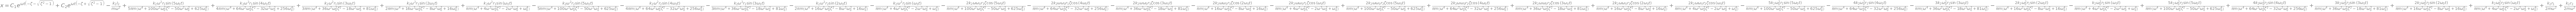

In [13]:
x_forzado_sol = sym.dsolve(x_EL_forzado)
x_forzado_sol

Puesto que interesa obtener la solución estacionaria, se eliminan los términos de la homogénea estableciendo $C_1 = C_2 = 0$.

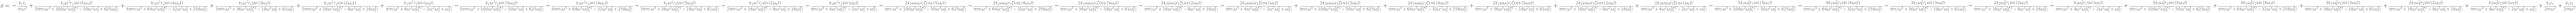

In [14]:
x_forzadoArmonico = x_forzado_sol.subs([('C1', 0), ('C2', 0)])
x_forzadoArmonico

Esta dinámica puede analizarse por ejemplo generando una gráfica de $x(t)$.

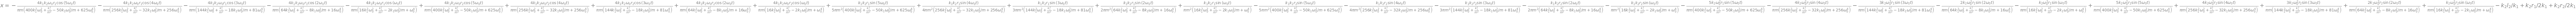

In [15]:
parametrosHomogeneo ={
    zeta : 2* sym.sqrt(k1* m),
    omega : sym.sqrt(k1/m)
}
x_parametrosHomogeneo = x_forzadoArmonico.subs(parametrosHomogeneo)
x_parametrosHomogeneo

Y finalmente los parámetros del sistema físico.

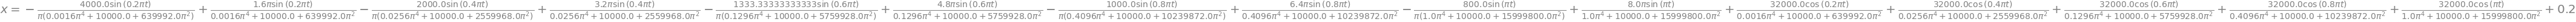

In [16]:
x_numerico = x_parametrosHomogeneo.subs(parametros)
x_numerico

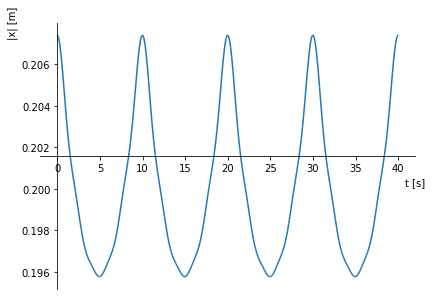

In [17]:
sym.plot(x_numerico.rhs, (t,0, 4* T0_num), ylabel='|x| [m]', xlabel='t [s]', adaptive=False, nb_of_points=300) 